In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))
from scipy.io import loadmat
from pathlib import Path
import matplotlib.patches as patches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import pandas as pd
# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa
from scipy import stats
import mne
import eeg_analysis.funcs4eeg as fe
import re
import imp
import ast
import behavior.func4behav as fb
imp.reload(fe)
imp.reload(fb)

<module 'behavior.func4behav' from 'c:\\Users\\Tianyi Zheng\\OneDrive - neuron.t.u-tokyo.ac.jp\\Documents\\zheng\\mywork\\attention_tES\\tes-attention\\processing\\behavior\\func4behav.py'>

In [2]:
case = 'endo valid'
watch = '11 stim'
tmin = -0.1
tmax = 0.5

sham_evoked_before, sham_evoked_after, real_evoked_before, real_evoked_after, rt_means, rt_std_errors = fe.pipeline_evoked_response_allsubs(case, watch, tmin, tmax)

In [3]:
# average along trials
k = 1.5
sham_before, sham_before_SEM = fe.trimmed_mean_std(sham_evoked_before, axis=0, k=k, verbose=True)
sham_after, sham_after_SEM = fe.trimmed_mean_std(sham_evoked_after, axis=0, k=k, verbose=True)
real_before, real_before_SEM = fe.trimmed_mean_std(real_evoked_before, axis=0, k=k, verbose=True)
real_after, real_after_SEM = fe.trimmed_mean_std(real_evoked_after, axis=0, k=k, verbose=True)

# low-pass filter
cutoff = 30
sham_before = fe.low_pass_filter(sham_before, sfreq=1200, cutoff=cutoff, order=5)
sham_after = fe.low_pass_filter(sham_after, sfreq=1200, cutoff=cutoff, order=5)
real_before = fe.low_pass_filter(real_before, sfreq=1200, cutoff=cutoff, order=5)
real_after = fe.low_pass_filter(real_after, sfreq=1200, cutoff=cutoff, order=5)

# add stim channel
stim_time = round(abs(tmin)*1200) # time step
stim = np.zeros((1, sham_before.shape[1]))
stim[0, stim_time] = 1

# add stim to eeg data
sham_before = np.concatenate((sham_before, stim), axis=0)
sham_after = np.concatenate((sham_after, stim), axis=0)
real_before = np.concatenate((real_before, stim), axis=0)
real_after = np.concatenate((real_after, stim), axis=0)

sham_before = fe.makeup_subject(sham_before, tmin, tmax)
sham_after = fe.makeup_subject(sham_after, tmin, tmax)
real_before = fe.makeup_subject(real_before, tmin, tmax)
real_after = fe.makeup_subject(real_after, tmin, tmax)

All trials: 387, removed outliers: 1454
All trials: 414, removed outliers: 1276
All trials: 375, removed outliers: 798
All trials: 405, removed outliers: 837
Creating RawArray with float64 data, n_channels=33, n_times=721
    Range : 0 ... 720 =      0.000 ...     0.600 secs
Ready.
1 events found
Event IDs: [1]
Creating RawArray with float64 data, n_channels=33, n_times=721
    Range : 0 ... 720 =      0.000 ...     0.600 secs
Ready.
1 events found
Event IDs: [1]
Creating RawArray with float64 data, n_channels=33, n_times=721
    Range : 0 ... 720 =      0.000 ...     0.600 secs
Ready.
1 events found
Event IDs: [1]
Creating RawArray with float64 data, n_channels=33, n_times=721
    Range : 0 ... 720 =      0.000 ...     0.600 secs
Ready.
1 events found
Event IDs: [1]


No projector specified for this dataset. Please consider the method self.add_proj.


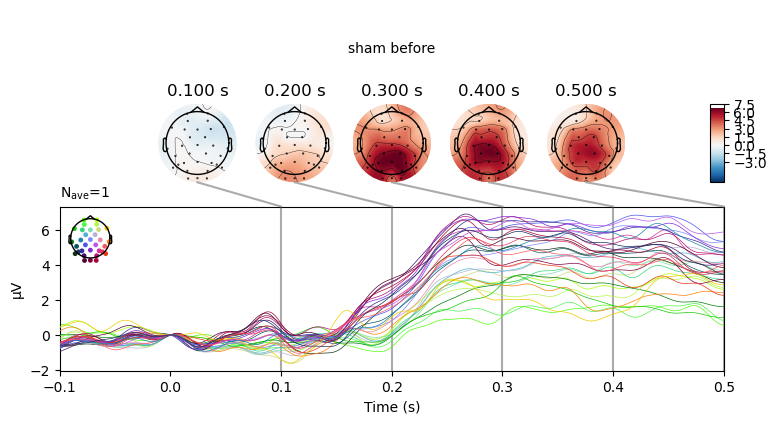

No projector specified for this dataset. Please consider the method self.add_proj.


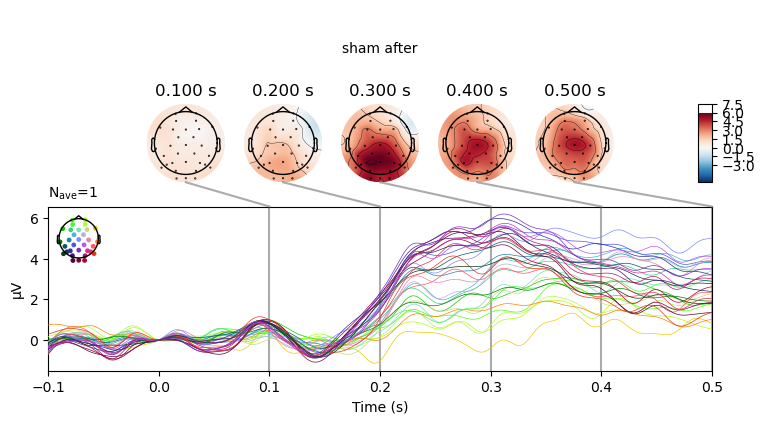

No projector specified for this dataset. Please consider the method self.add_proj.


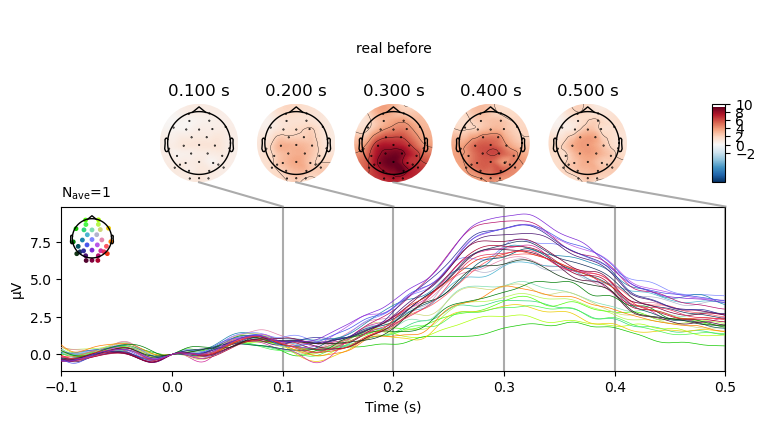

No projector specified for this dataset. Please consider the method self.add_proj.


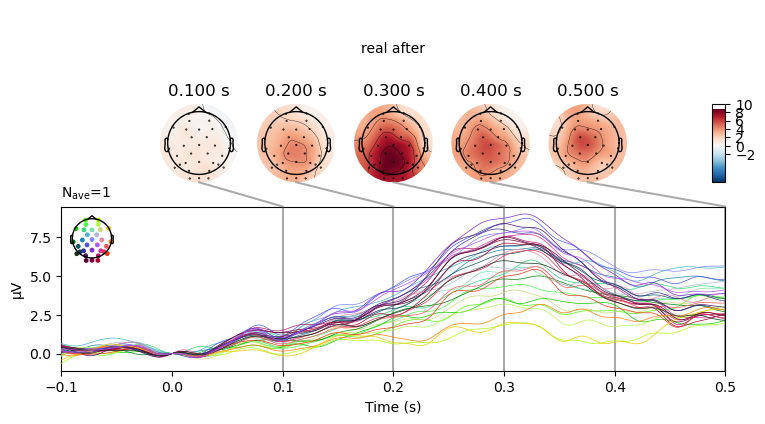

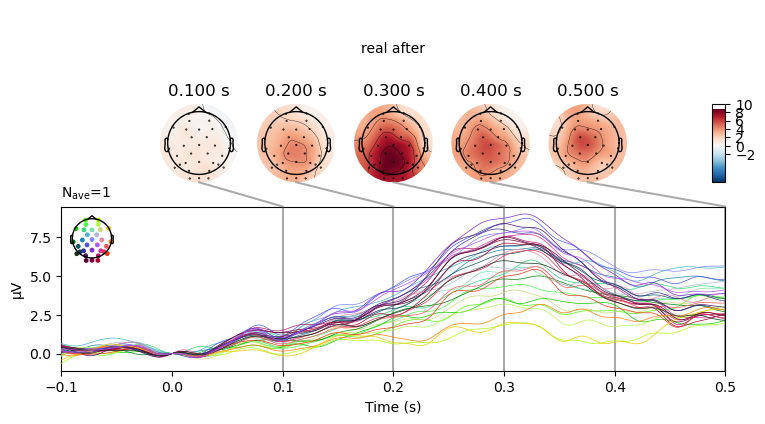

In [4]:
sham_before.plot_joint(picks="eeg", times=[0.1, 0.2, 0.3, 0.4, 0.5], title='sham before')
sham_after.plot_joint(picks="eeg", times=[0.1, 0.2, 0.3, 0.4, 0.5], title='sham after')
real_before.plot_joint(picks="eeg", times=[0.1, 0.2, 0.3, 0.4, 0.5], title='real before')
real_after.plot_joint(picks="eeg", times=[0.1, 0.2, 0.3, 0.4, 0.5], title='real after')

### Substract

In [5]:
# average along trials
k = 1
sham_before, sham_before_SEM = fe.trimmed_mean_std(sham_evoked_before, axis=0, k=k, verbose=True)
sham_after, sham_after_SEM = fe.trimmed_mean_std(sham_evoked_after, axis=0, k=k, verbose=True)
real_before, real_before_SEM = fe.trimmed_mean_std(real_evoked_before, axis=0, k=k, verbose=True)
real_after, real_after_SEM = fe.trimmed_mean_std(real_evoked_after, axis=0, k=k, verbose=True)

sham = sham_after - sham_before
real = real_after - real_before
real_sub_sham = real - sham

# low-pass filter
cutoff = 30
sham = fe.low_pass_filter(sham, sfreq=1200, cutoff=cutoff, order=5)
real = fe.low_pass_filter(real, sfreq=1200, cutoff=cutoff, order=5)
real_sub_sham = fe.low_pass_filter(real_sub_sham, sfreq=1200, cutoff=cutoff, order=5)

# add stim channel
stim_time = round(abs(tmin)*1200) # time step
stim = np.zeros((1, sham_before.shape[1]))
stim[0, stim_time] = 1

# add stim to eeg data
sham = np.concatenate((sham, stim), axis=0)
real = np.concatenate((real, stim), axis=0)
real_sub_sham = np.concatenate((real_sub_sham, stim), axis=0)

sham = fe.makeup_subject(sham, tmin, tmax)
real = fe.makeup_subject(real, tmin, tmax)
real_sub_sham = fe.makeup_subject(real_sub_sham, tmin, tmax)

All trials: 387, removed outliers: 2463
All trials: 414, removed outliers: 2467
All trials: 375, removed outliers: 2010
All trials: 405, removed outliers: 2008
Creating RawArray with float64 data, n_channels=33, n_times=721
    Range : 0 ... 720 =      0.000 ...     0.600 secs
Ready.
1 events found
Event IDs: [1]
Creating RawArray with float64 data, n_channels=33, n_times=721
    Range : 0 ... 720 =      0.000 ...     0.600 secs
Ready.
1 events found
Event IDs: [1]
Creating RawArray with float64 data, n_channels=33, n_times=721
    Range : 0 ... 720 =      0.000 ...     0.600 secs
Ready.
1 events found
Event IDs: [1]


No projector specified for this dataset. Please consider the method self.add_proj.


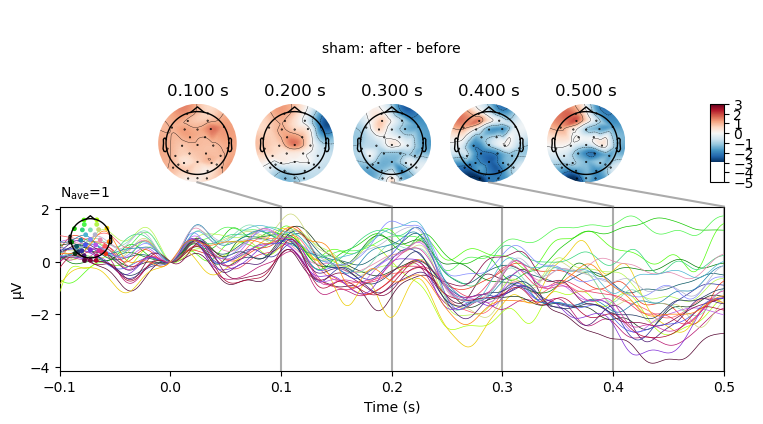

No projector specified for this dataset. Please consider the method self.add_proj.


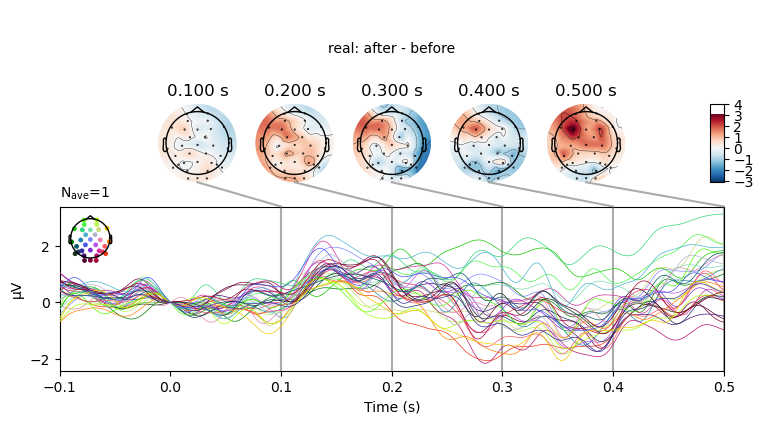

No projector specified for this dataset. Please consider the method self.add_proj.


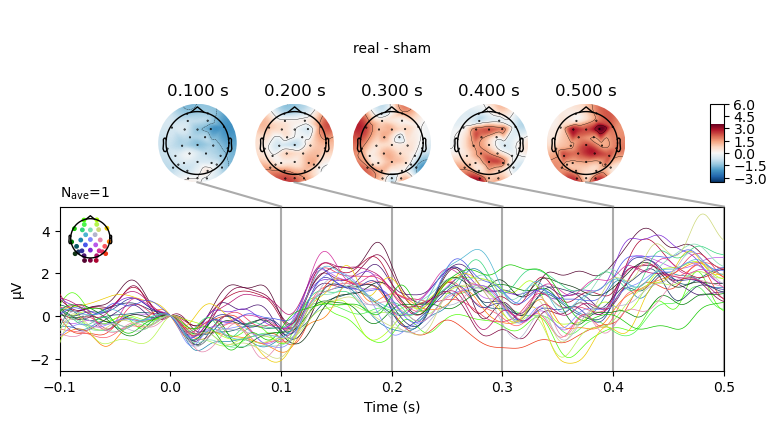

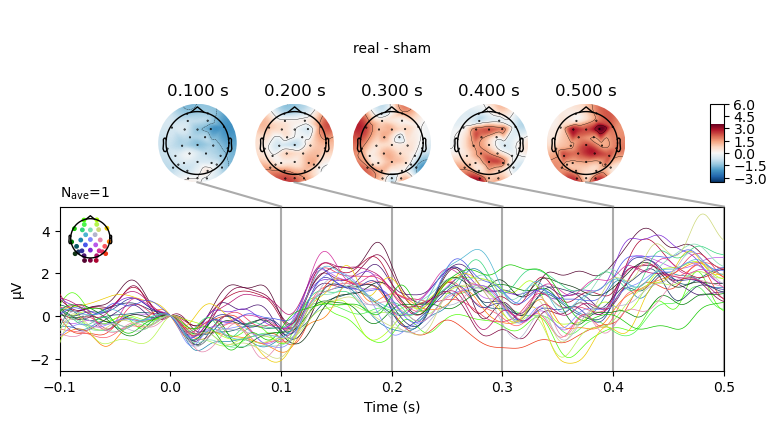

In [6]:
sham.plot_joint(picks="eeg", times=[0.1, 0.2, 0.3, 0.4, 0.5], title='sham: after - before')
real.plot_joint(picks="eeg", times=[0.1, 0.2, 0.3, 0.4, 0.5], title='real: after - before')
real_sub_sham.plot_joint(picks="eeg", times=[0.1, 0.2, 0.3, 0.4, 0.5], title='real - sham')

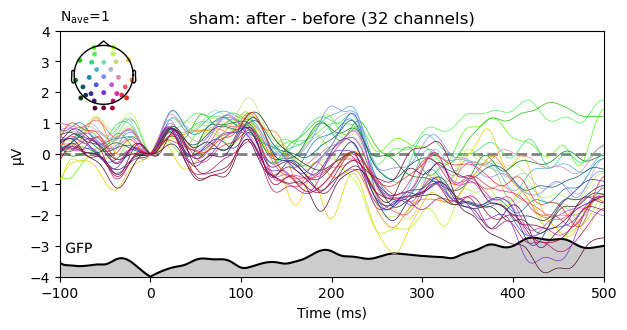

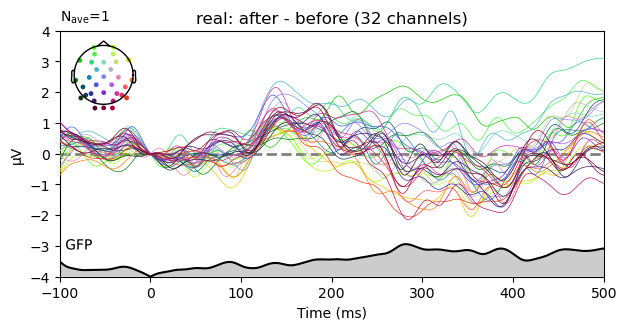

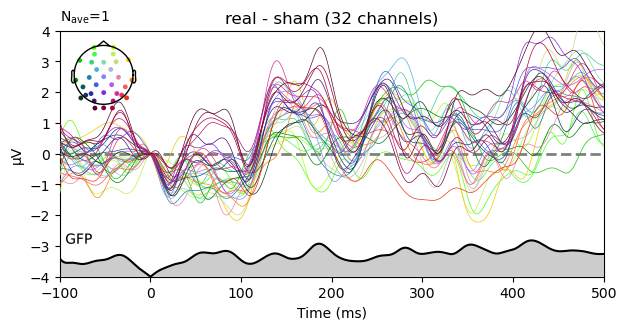

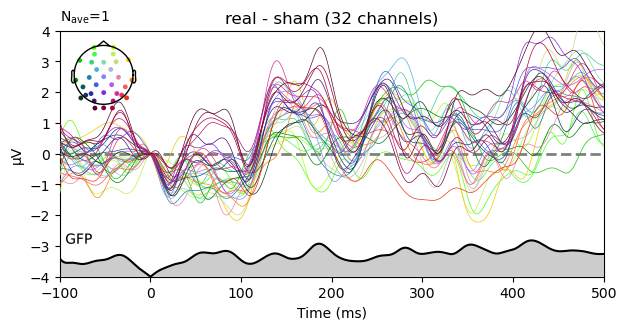

In [7]:
sham.plot(spatial_colors=True, gfp=True, time_unit='ms', titles = 'sham: after - before', ylim=dict(eeg=[-4, 4]), hline=[0])
real.plot(spatial_colors=True, gfp=True, time_unit='ms', titles = 'real: after - before', ylim=dict(eeg=[-4, 4]), hline=[0])
real_sub_sham.plot(spatial_colors=True, gfp=True, time_unit='ms', titles = 'real - sham', ylim=dict(eeg=[-4, 4]), hline=[0])

In [8]:
# median of channels
sham_before = np.median(sham_evoked_before, axis=1)
sham_after = np.median(sham_evoked_after, axis=1)
real_before = np.median(real_evoked_before, axis=1)
real_after = np.median(real_evoked_after, axis=1)


cutoff = 50
sham_before = fe.low_pass_filter(sham_before, sfreq=1200, cutoff=cutoff, order=5)
sham_after = fe.low_pass_filter(sham_after, sfreq=1200, cutoff=cutoff, order=5)
real_before = fe.low_pass_filter(real_before, sfreq=1200, cutoff=cutoff, order=5)
real_after = fe.low_pass_filter(real_after, sfreq=1200, cutoff=cutoff, order=5)

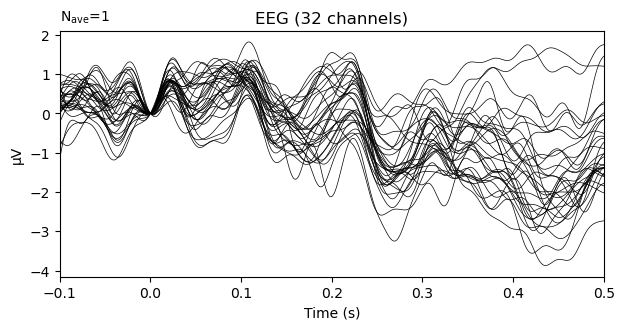

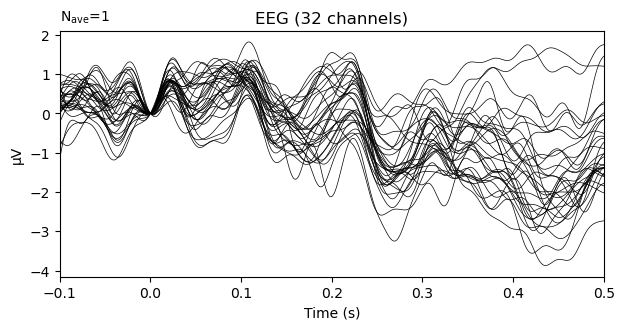

### Two before: see endo and exo are different

ValueError: operands could not be broadcast together with shapes (387,721) (32,721) 

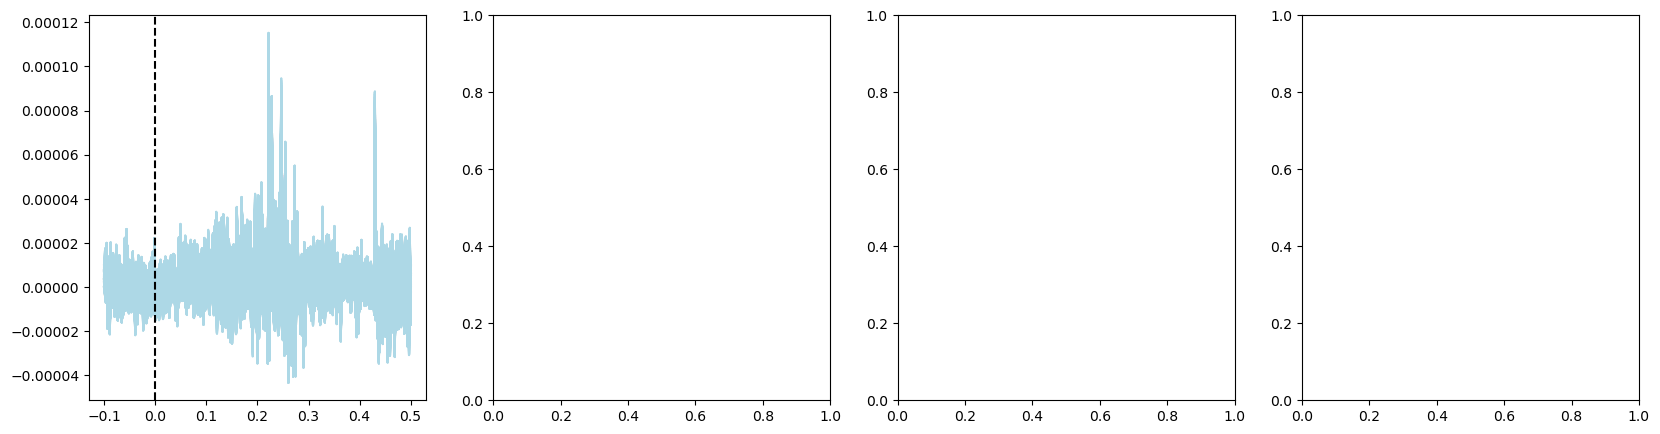

In [9]:
labels = ['Sham Before', 'Sham After', 'Real Before', 'Real After']
colors = ['lightblue', 'blue', 'lightcoral', 'red']
evoked_data = [sham_before, sham_after, real_before, real_after]
SEM_data = [sham_before_SEM, sham_after_SEM, real_before_SEM, real_after_SEM]

# Create a figure and a set of axes
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# For each set of evoked data, calculate mean and std, then plot
for ax, evoked_data, SEM_data, label, color in zip(axes, evoked_data, SEM_data, labels, colors):

    times = np.linspace(tmin, tmax, len(evoked_data))  # Assuming a sampling rate of 1200 Hz
    ax.plot(times, evoked_data, color=color, label=label)

    ax.axvline(x=0, color='k', linestyle='--')
    ax.fill_between(times, evoked_data - SEM_data, evoked_data + SEM_data, color=color, alpha=0.3)
    ax.set_title(case + ': ' +label)

    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    

plt.tight_layout()
plt.show()

### See stim to Endo and Exo

In [ ]:
# Subtract the 'before' data from the 'after' data
real_evoked_sub = np.subtract(real_evoked_after, real_evoked_before)
sham_evoked_sub = np.subtract(sham_evoked_after, sham_evoked_before)
real_evoked_sub = fe.low_pass_filter(real_evoked_sub, sfreq=1200, cutoff=80, order=5)
sham_evoked_sub = fe.low_pass_filter(sham_evoked_sub, sfreq=1200, cutoff=80, order=5)

# Create a new time array for the subtracted data
# (Assuming the time dimension is still the same length as before)
time = np.linspace(tmin, tmax, real_evoked_sub.shape[-1])

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot subtracted real data
for i in range(real_evoked_sub.shape[0]):
    plt.plot(time, real_evoked_sub[i, :], color='#d62728')

# Plot subtracted sham data
for i in range(sham_evoked_sub.shape[0]):
    plt.plot(time, sham_evoked_sub[i, :], color='#1f77b4')

# Add a vertical dashed line at time=0s
plt.axvline(x=0, color='k', linestyle='--')

# Add labels and a title
plt.title('Subtracted Evoked Responses'+' '+case+' '+watch)
plt.xlabel('Time (s)')
plt.ylabel('Evoked response difference')

# Display the plot
plt.show()


ValueError: operands could not be broadcast together with shapes (405,32,721) (375,32,721) 

In [ ]:
# Calculate the mean and standard deviation
real_mean, real_std = fe.trimmed_mean_std(real_evoked_sub, axis=0)
sham_mean, sham_std = fe.trimmed_mean_std(sham_evoked_sub, axis=0)

# # Calculate the mean and standard deviation
# real_mean = np.mean(real_evoked_sub, axis=0)
# real_std = np.std(real_evoked_sub, axis=0)

# sham_mean = np.mean(sham_evoked_sub, axis=0)
# sham_std = np.std(sham_evoked_sub, axis=0)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the mean for real and sham data with shaded std deviation
plt.plot(time, real_mean, color='#d62728', label='real')
plt.fill_between(time, real_mean - real_std, real_mean + real_std, color='#d62728', alpha=0.3)

plt.plot(time, sham_mean, color='#1f77b4', label='sham')
plt.fill_between(time, sham_mean - sham_std, sham_mean + sham_std, color='#1f77b4', alpha=0.3)

# Add a vertical dashed line at time=0s
plt.axvline(x=0, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='--')


# Add labels, a title, and a legend
plt.title('Mean Subtracted Evoked Responses'+' '+case+' '+watch)
plt.xlim([time[0], time[-1]])
plt.xlabel('Time (s)')
plt.ylabel('Mean evoked response difference')
plt.legend()

# Display the plot
plt.show()


NameError: name 'real_evoked_sub' is not defined

ValueError: x and y must have same first dimension, but have shapes (721,) and (32, 721)

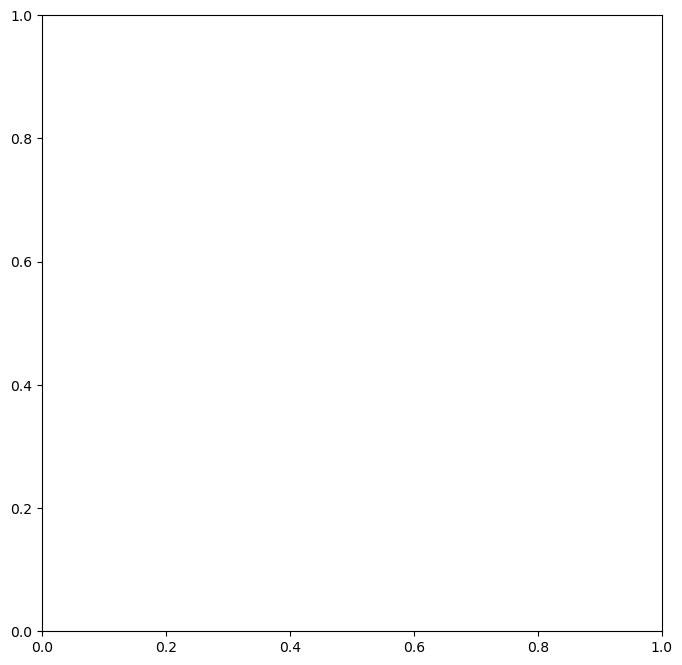

In [ ]:
# Assuming that your data is arranged such that the time dimension is the last one.
# And that the length of the time dimension is 100 (change it to your actual size).
time = np.linspace(tmin, tmax, real_evoked_before.shape[-1])

# Plot before
plt.figure(figsize=(8, 8))
for i in range(real_evoked_before.shape[0]):
    plt.plot(time, real_evoked_before[i, :], color='#d62728')
for i in range(sham_evoked_before.shape[0]):
    plt.plot(time, sham_evoked_before[i, :], color='#1f77b4')
plt.axvline(x=0, color='k', linestyle='--')  # add a vertical dashline at time=0s.
plt.title('Before')
plt.xlabel('Time (s)')
plt.ylabel('Evoked response before')
plt.show()


# Plot after
plt.figure(figsize=(8, 8))
for i in range(real_evoked_after.shape[0]):
    plt.plot(time, real_evoked_after[i, :], color='#d62728')
for i in range(sham_evoked_after.shape[0]):
    plt.plot(time, sham_evoked_after[i, :], color='#1f77b4')
plt.axvline(x=0, color='k', linestyle='--')  # add a vertical dashline at time=0s.
plt.title('After')
plt.xlabel('Time (s)')
plt.ylabel('Evoked response after')

plt.tight_layout()
plt.show()


In [ ]:
# evoked_before.plot_topo()